In [171]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sn
import pickle

import warnings
warnings.filterwarnings('ignore')

In [121]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')

In [122]:
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [123]:
data.shape

(32560, 15)

In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [125]:
data.Workclass.unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [126]:
data.Education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [127]:
data.Education_num.unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

In [128]:
data.Occupation.unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [129]:
data.Relationship.unique()

array([' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [130]:
data.Race.unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [131]:
data.Sex.unique()

array([' Male', ' Female'], dtype=object)

In [132]:
data.Native_country.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [133]:
data.Income.unique()

array([' <=50K', ' >50K'], dtype=object)

By looking into data there are no nan's present and by looking into data there are some '?' present in Workclass,Occupation,Native_country these columns should be treated and there are object datatype that should be treated

In [134]:
data.Workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [135]:
data.Occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [136]:
data.Native_country.value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [137]:
data.Education.value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

In [138]:
data.Education_num.value_counts()

9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education_num, dtype: int64

Education column and Education_num column has same sum of values and by looking this any one column can be deleted, using mode method '?' data can be filled by maximum counts i.e., Workclass with Private, Occupation with Prof-specialty and Native_country with United-States 

In [139]:
data['Workclass'] = data['Workclass'].replace(' ?', 'Private')
data['Occupation'] = data['Occupation'].replace(' ?', 'Prof-specialty')
data['Native_country'] = data['Native_country'].replace(' ?', 'United-States')

In [145]:
data['Workclass'] = LabelEncoder().fit_transform(data['Workclass'])
data['Marital_status'] = LabelEncoder().fit_transform(data['Marital_status'])
data['Occupation'] = LabelEncoder().fit_transform(data['Occupation'])
data['Relationship'] = LabelEncoder().fit_transform(data['Relationship'])
data['Race'] = LabelEncoder().fit_transform(data['Race'])
data['Sex'] = LabelEncoder().fit_transform(data['Sex'])
data['Native_country'] = LabelEncoder().fit_transform(data['Native_country'])
data['Income'] = LabelEncoder().fit_transform(data['Income'])
data['Education'] = LabelEncoder().fit_transform(data['Education'])

In [146]:
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0


In [153]:
data.drop('Education',axis = 1)

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,14,2,3,5,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,257302,12,2,12,5,4,0,0,0,38,38,0
32556,40,3,154374,9,2,6,0,4,1,0,0,40,38,1
32557,58,3,151910,9,6,0,4,4,0,0,0,40,38,0
32558,22,3,201490,9,4,0,3,4,1,0,0,20,38,0


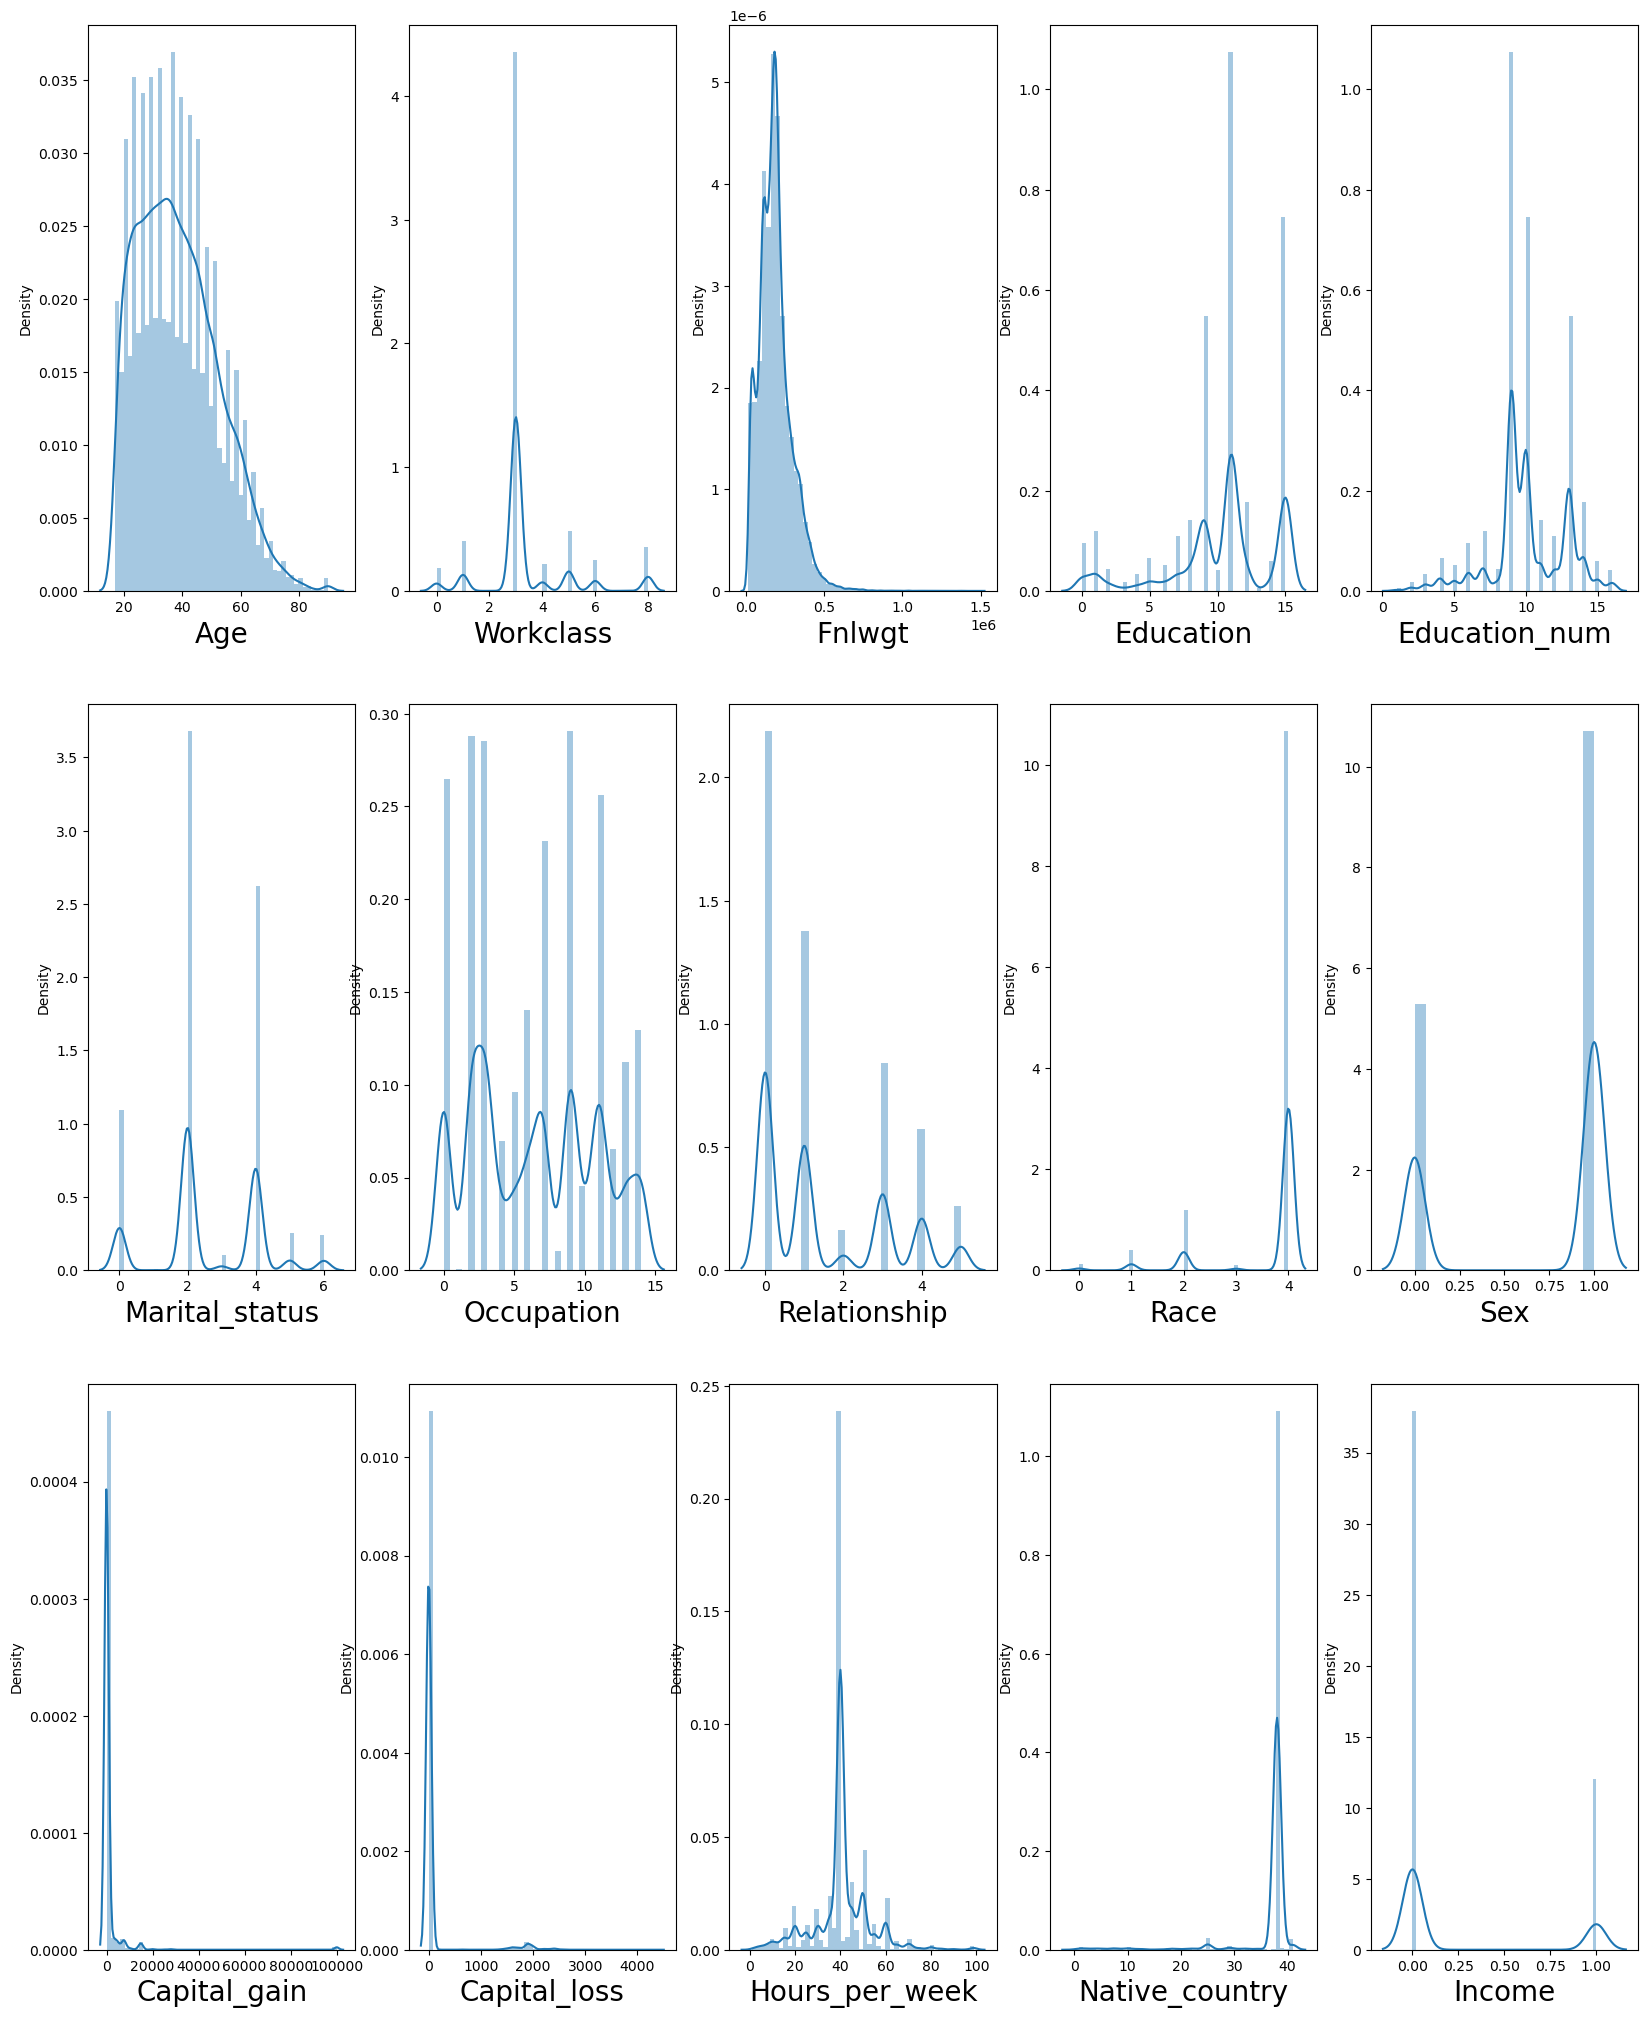

In [154]:
plt.figure(figsize=(20,25))
plotnumber = 1

for column in data:
    if plotnumber <= 15:
        ax = plt.subplot(3,5,plotnumber)
        sn.distplot(data[column])
        plt.xlabel(column,fontsize = 20)
        
    plotnumber +=1
plt.show()

when looking into graph there are skewness in the data

In [155]:
x = data.drop('Income',axis = 1)
y = data['Income']

In [156]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [157]:
def metric_score(clf,x_train,x_test,y_train,y_test,train = True):
    if train:
        y_predict = clf.predict(x_train)
        print('\n ---------- Train Result ----------')
        print(f'Accuracy Score : {accuracy_score(y_train,y_predict)  * 100:.2f}%')
        
        
    elif train == False:
        predict = clf.predict(x_test)
        print('\n ---------- Test Result ----------')
        print(f'Accuracy Score : {accuracy_score(y_test,predict)  * 100:.2f}%')
        
        print('\n \n Test Classification Report \n', classification_report(y_test,predict,digits = 2))

In [158]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [159]:
metric_score(clf,x_train,x_test,y_train,y_test,train = True)
metric_score(clf,x_train,x_test,y_train,y_test,train = False)


 ---------- Train Result ----------
Accuracy Score : 100.00%

 ---------- Test Result ----------
Accuracy Score : 81.55%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      6176
           1       0.61      0.65      0.63      1964

    accuracy                           0.82      8140
   macro avg       0.75      0.76      0.75      8140
weighted avg       0.82      0.82      0.82      8140



In [160]:
grid_param = {'criterion': ['grid','entropy'],
             'max_depth' : range(20,25),
              'min_samples_leaf' : range(2,6),
              'min_samples_split' : range(3,8),
              'max_leaf_nodes' : range(5,10)
             }

In [161]:
grid_search = GridSearchCV(estimator = clf,param_grid = grid_param,cv = 5)

In [162]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['grid', 'entropy'],
                         'max_depth': range(20, 25),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [163]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 20, 'max_leaf_nodes': 6, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [167]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 20, max_leaf_nodes = 6, min_samples_leaf = 2, min_samples_split = 3)
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20, max_leaf_nodes=6,
                       min_samples_leaf=2, min_samples_split=3)

In [168]:
metric_score(clf,x_train,x_test,y_train,y_test,train = True)
metric_score(clf,x_train,x_test,y_train,y_test,train = False)


 ---------- Train Result ----------
Accuracy Score : 83.91%

 ---------- Test Result ----------
Accuracy Score : 84.19%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.85      0.96      0.90      6176
           1       0.78      0.48      0.59      1964

    accuracy                           0.84      8140
   macro avg       0.82      0.72      0.75      8140
weighted avg       0.84      0.84      0.83      8140



In [169]:
clf = LogisticRegression()
clf.fit(x_train,y_train)

LogisticRegression()

In [170]:
metric_score(clf,x_train,x_test,y_train,y_test,train = True)
metric_score(clf,x_train,x_test,y_train,y_test,train = False)


 ---------- Train Result ----------
Accuracy Score : 79.09%

 ---------- Test Result ----------
Accuracy Score : 79.36%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.81      0.95      0.88      6176
           1       0.67      0.29      0.40      1964

    accuracy                           0.79      8140
   macro avg       0.74      0.62      0.64      8140
weighted avg       0.77      0.79      0.76      8140



In [172]:
clf = KNeighborsClassifier()
clf.fit(x_train,y_train)

KNeighborsClassifier()

In [173]:
metric_score(clf,x_train,x_test,y_train,y_test,train = True)
metric_score(clf,x_train,x_test,y_train,y_test,train = False)


 ---------- Train Result ----------
Accuracy Score : 83.30%

 ---------- Test Result ----------
Accuracy Score : 77.78%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.81      0.92      0.86      6176
           1       0.57      0.32      0.41      1964

    accuracy                           0.78      8140
   macro avg       0.69      0.62      0.64      8140
weighted avg       0.75      0.78      0.75      8140

